# Module imports

In [ ]:
from IPython import display
from ultralytics import YOLO
from IPython.display import display, Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import easyocr
import os

# Model imports

In [ ]:
# importing the model
model = YOLO('./model/best.pt')

# importing easyOCR
reader = easyocr.Reader(['en'])

# Image extracting and preprocessing


image 1/1 /Users/dhruv/Documents/Programming/Projects/kavach/kavach-23/scripts/recognition-prince/easy-ocr/script/P_20230323_131158.jpg: 640x480 1 licence, 167.6ms
Speed: 0.6ms preprocess, 167.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


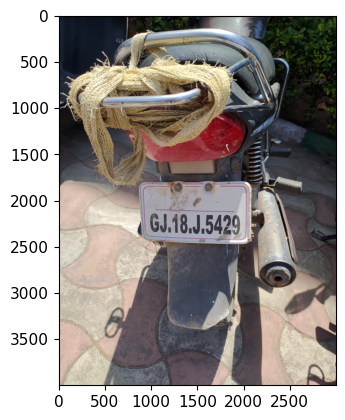

In [22]:
path = 'P_20230323_131158.jpg'
x = model.predict(path)

temp=[]
box_value = []

for i in range(len(x[0])):
    temp.append(x[0][i])
    
for i in range(len(x[0])):
    x_box = temp[i].boxes
    bbox_raw = x_box.xyxy[0]
    v = [int(bbox_raw[i]) for i in range(len(bbox_raw))]
    box_value.append(v)

image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

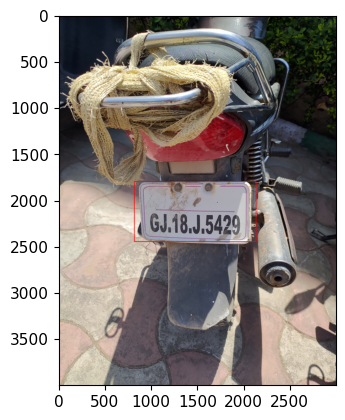

In [23]:
new_image = image.copy()
for i in box_value:
    for j in range(len(i)):
        cv2.rectangle(new_image, (box_value[0][0], box_value[0][1]), (box_value[0][2], box_value[0][3]), (0,0,255), 5)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

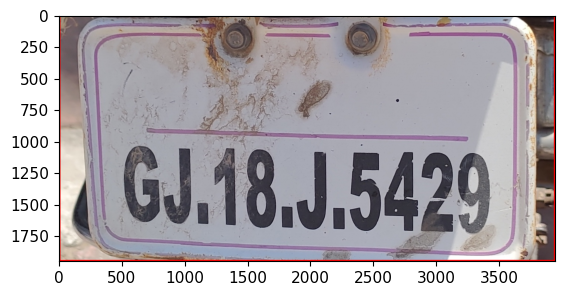

In [24]:
cropped_image = new_image[box_value[0][1]:box_value[0][3], box_value[0][0]:box_value[0][2] ]
cropped_image = cv2.resize(cropped_image , None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
x = plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

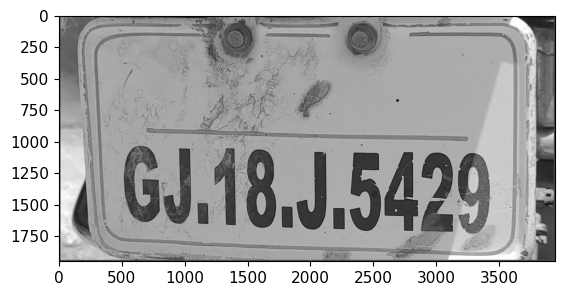

In [25]:
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
x = plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

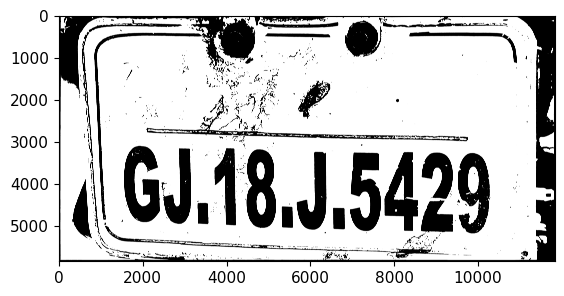

In [26]:
gray_image = cv2.resize(gray_image , None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(blackAndWhiteImage, cv2.COLOR_BGR2RGB))

In [27]:
img = blackAndWhiteImage
results = reader.readtext(img, detail=1)

# result
for result in results:
    print(result[1])

AaC
GJ,18,J,5429
